# 텍스트 데이터를 이용한 머신러닝/딥러닝 분석

### 시작하기 전에

데스크톱에서 실행하는 경우, 아나콘다를 설치한 뒤에, 가상환경을 설치하고 진행하는 것을 추천합니다.

<img src='https://dojang.io/pluginfile.php/14099/mod_page/content/4/047005.png' width=500 height=500></img>
<img src='https://dojang.io/pluginfile.php/14099/mod_page/content/4/047006.png' width=500 height=500></img>

한국어 품사 분석을 위한 라이브러리 koNLPy의 설명에 대해서는 아래의 링크를 참고하시기 바랍니다.<p>
https://konlpy.org/ko/latest/

# 한국어 데이터 처리하기

일반적인 텍스트 데이터는 모델을 학습하기 이전에 여러 가지 작업을 거치게 됩니다. 이를 전처리(Preprocessing)이라고 합니다.

<b>토크나이징(Tokenizing)</b>이란?<br>
주어진 텍스트를 분석할 수 있는 단위인 토큰(token)으로 쪼개는 것<br>토크나이징은 단어, 문장 등의 단위에 따라 쪼갤 수 있다.

예를 들어 '아빠가 방에 들어가신다.'는 문장은 품사를 고려한다면<br>
'아빠', '가', '방', '에', '들어가신다'로 나눌 수 있고 띄어쓰기를 기준으로 한다면<br>
'아빠가', '방에', '들어가신다'로 나눌 수 있다.<br>
그리고 실제 분석에서 의미가 있는 것들은 조사가 아니라 명사나 동사이므로 여기서 '가', '에' 등은 제외하기도 한다.

일반적인 토크나이징은 ntlk나 spacy 등의 라이브러리에서 제공되는 함수로도 가능하다.

In [2]:
!pip list | grep spacy

spacy                     3.0.1
spacy-legacy              3.0.1


In [ ]:
!pip install nltk spacy

<b>Q</b>. 한국어 품사 분석기를 사용하는 이유는 무엇일까요?<br>
<b>A</b>. 영어와 달리 한국어는 띄어쓰기 단위로만 쪼갤 수가 없다.

## NTLK를 이용한 토크나이징
### NTLK를 이용하면 띄어쓰기를 일반적으로 기준으로 하게 된다.

In [14]:
# NTLK가 설치되어 있지 않다면 다음 코드를 사용할 수 있다.
!pip install nltk

In [3]:
from nltk.tokenize import word_tokenize, sent_tokenize

sentence = '''We hold these truths to be self-evident, that all men are created equal, 
that they are endowed by their Creator with certain unalienable Rights, that among these are Life, 
Liberty and the pursuit of Happiness. That to secure these rights, Governments are instituted among Men, 
deriving their just powers from the consent of the governed. That whenever any Form of Government becomes 
destructive of these ends, it is the Right of the People to alter or to abolish it, 
and to institute new Government, laying its foundation on such principles and organizing its powers in such form, 
as to them shall seem most likely to effect their Safety and Happiness.'''

word_tokenize(sentence)

['We',
 'hold',
 'these',
 'truths',
 'to',
 'be',
 'self-evident',
 ',',
 'that',
 'all',
 'men',
 'are',
 'created',
 'equal',
 ',',
 'that',
 'they',
 'are',
 'endowed',
 'by',
 'their',
 'Creator',
 'with',
 'certain',
 'unalienable',
 'Rights',
 ',',
 'that',
 'among',
 'these',
 'are',
 'Life',
 ',',
 'Liberty',
 'and',
 'the',
 'pursuit',
 'of',
 'Happiness',
 '.',
 'That',
 'to',
 'secure',
 'these',
 'rights',
 ',',
 'Governments',
 'are',
 'instituted',
 'among',
 'Men',
 ',',
 'deriving',
 'their',
 'just',
 'powers',
 'from',
 'the',
 'consent',
 'of',
 'the',
 'governed',
 '.',
 'That',
 'whenever',
 'any',
 'Form',
 'of',
 'Government',
 'becomes',
 'destructive',
 'of',
 'these',
 'ends',
 ',',
 'it',
 'is',
 'the',
 'Right',
 'of',
 'the',
 'People',
 'to',
 'alter',
 'or',
 'to',
 'abolish',
 'it',
 ',',
 'and',
 'to',
 'institute',
 'new',
 'Government',
 ',',
 'laying',
 'its',
 'foundation',
 'on',
 'such',
 'principles',
 'and',
 'organizing',
 'its',
 'powers',
 '

In [6]:
from nltk.tokenize import sent_tokenize

sent_tokenize(sentence.replace('\n', ''))

['We hold these truths to be self-evident, that all men are created equal, that they are endowed by their Creator with certain unalienable Rights, that among these are Life, Liberty and the pursuit of Happiness.',
 'That to secure these rights, Governments are instituted among Men, deriving their just powers from the consent of the governed.',
 'That whenever any Form of Government becomes destructive of these ends, it is the Right of the People to alter or to abolish it, and to institute new Government, laying its foundation on such principles and organizing its powers in such form, as to them shall seem most likely to effect their Safety and Happiness.']

## KoNLPy를 이용한 토크나이징

KoNLPy에 대한 설명 참고 https://konlpy.org/en/latest/

In [ ]:
# KoNLPy를 설치하지 않았을 경우 실행합니다.
!pip install konlpy

In [ ]:
# MeCab 설치를 위한 코드입니다. (아래는 Mac에서의 실행 코드)
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

### 꼬꼬마 형태소 분석기의 실행

In [7]:
from konlpy.tag import Kkma
# 꼬꼬마 형태소 분석기 객체 생성
kkma = Kkma()
text = "아버지가 방에 들어갑니다."

# 형태소 추출
morphs = kkma.morphs(text)
print(morphs)

# 형태소와 품사 태그 추출
pos = kkma.pos(text)
print(pos)

# 명사만 추출
nouns = kkma.nouns(text)
print(nouns)

# 문장 분리
sentences = "오늘 날씨는 어때요? 내일은 덥다던데."
s = kkma.sentences(sentences)
print(s)

['아버지', '가', '방', '에', '들어가', 'ㅂ니다', '.']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKM'), ('들어가', 'VV'), ('ㅂ니다', 'EFN'), ('.', 'SF')]
['아버지', '방']
['오늘 날씨는 어 때요?', '내일은 덥다 던데.']


|  품사  |  설명  |
|-------|-------|
|NNG    |일반명사 |
|JKS    |주격 조사 |
|JKM    |부사격 조사 |
|VV     |동사    |
|EFN    |평서형 종결 어미|
|SF     |마침표, 물음표, 느낌표|

### 코모란 형태소 분석기의 실행

In [8]:
from konlpy.tag import Komoran

# 코모란 형태소 분석기 객체 생성
komoran = Komoran()
text = "아버지가 방에 들어갑니다."

# 형태소 추출
morphs = komoran.morphs(text)
print(morphs)

# 형태소와 품사 태그 추출
pos = komoran.pos(text)
print(pos)

# 명사만 추출
nouns = komoran.nouns(text)
print(nouns)

['아버지', '가', '방', '에', '들어가', 'ㅂ니다', '.']
[('아버지', 'NNG'), ('가', 'JKS'), ('방', 'NNG'), ('에', 'JKB'), ('들어가', 'VV'), ('ㅂ니다', 'EF'), ('.', 'SF')]
['아버지', '방']


### 트위터(Okt)의 형태소 분석기의 실행

In [9]:
from konlpy.tag import Okt

# Okt 형태소 분석기 객체 생성
okt = Okt()
text = "아버지가 방에 들어갑니다."

# 형태소 추출
morphs = okt.morphs(text)
print(morphs)

# 형태소와 품사 태그 추출
pos = okt.pos(text)
print(pos)

# 명사만 추출
nouns = okt.nouns(text)
print(nouns)

# 정규화, 어구 추출
text = "오늘 날씨가 좋아욬ㅋㅋ"
print(okt.normalize(text))
print(okt.phrases(text))

['아버지', '가', '방', '에', '들어갑니다', '.']
[('아버지', 'Noun'), ('가', 'Josa'), ('방', 'Noun'), ('에', 'Josa'), ('들어갑니다', 'Verb'), ('.', 'Punctuation')]
['아버지', '방']
오늘 날씨가 좋아요ㅋㅋ
['오늘', '오늘 날씨', '좋아욬', '날씨']


### 사용자 사전 구축

In [10]:
from konlpy.tag import Komoran

komoran = Komoran()
text = "우리 챗봇은 엔엘피를 좋아해."
pos = komoran.pos(text)
print(pos)

[('우리', 'NP'), ('챗봇은', 'NA'), ('엔', 'NNB'), ('엘', 'NNP'), ('피', 'NNG'), ('를', 'JKO'), ('좋아하', 'VV'), ('아', 'EF'), ('.', 'SF')]


In [11]:
# 사용자 사전 추가하기
from konlpy.tag import Komoran

komoran = Komoran(userdic='user_dic.tsv') # 사용자 사전 위치와 파일명
text = "우리 챗봇은 엔엘피를 좋아해."
pos = komoran.pos(text)
print(pos)

[('우리', 'NP'), ('챗봇은', 'NA'), ('엔엘피', 'NNG'), ('를', 'JKO'), ('좋아하', 'VV'), ('아', 'EF'), ('.', 'SF')]


|형태소 분석기|장점| 단점|
|---|--|--|
|Kkma      |분석 품질이 좋음. 품사 태그가 다양함 | 분석 속도가 느림|
|Komoran   |자소 분리된 문장이나 오탈자에 강하고 사용자 사전 관리에 용이함|보통의 분석 속도와 품질|
|Okt       |매우 분석 속도가 빠르고 정규화 기능을 지원함 |사용자 사전 관리가 어려움|

<H7> 아래는 여러 가지 형태소 분석기의 성능을 비교한 그림입니다.<p>
아래에서 보듯이 시간이 지날수록 가장 성능이 탁월한 것은(소요 시간이 적은 것) 꼬꼬마 < 코모란 < 한나눔 < 트위터 < 미캡 입니다. </H7>

<img src='https://konlpy.org/ko/v0.6.0/_images/time.png' width=600 height=600></img>

In [12]:
from IPython.display import IFrame

IFrame(src='http://kkma.snu.ac.kr/documents/index.jsp?doc=postag', width=960, height=1800)

# 트랜스포머(BERT)를 이용한 토크나이징

인코더와 디코더로 이뤄진 구조임!

<img src='https://pytorch.org/tutorials/_images/bert.png' width=600 height=400></img>

In [ ]:
!pip install transformers

In [13]:
from transformers import *

tokenizer = BertTokenizer.from_pretrained(
    "bert-base-multilingual-cased", cache_dir='bert_ckpt', 
    do_lower_case=False)

In [14]:
test_sentence = '만나서 반갑습니다. 좋은 아침입니다.'

encode = tokenizer.encode(test_sentence)
token_print = [tokenizer.decode(token) for token in encode]

print(encode)
print(token_print)

[101, 9248, 16439, 12424, 9321, 118610, 119081, 48345, 119, 79633, 9519, 119285, 58303, 48345, 119, 102]
['[ C L S ]', '만', '# # 나', '# # 서', '반', '# # 갑', '# # 습', '# # 니 다', '.', '좋 은', '아', '# # 침', '# # 입', '# # 니 다', '.', '[ S E P ]']


## 사전 훈련된 모델을 이용한 토크나이징

In [5]:
!pip install emoji==0.6.0
!pip install soynlp==0.0.493

     |████████████████████████████████| 51 kB 6.3 MB/s eta 0:00:011
  Created wheel for emoji: filename=emoji-0.6.0-py3-none-any.whl size=49714 sha256=45e199d95ebed90f56a4364d53824e420b64a17636beeae647a3fd2046ade3b9
  Stored in directory: /Users/jhohunkoog/Library/Caches/pip/wheels/43/3d/82/e7baffa5e86346c6178d7750dba6e8ef063282a37fc563f8f8
Successfully built emoji
  Using cached soynlp-0.0.493-py3-none-any.whl (416 kB)
     |████████████████████████████████| 243 kB 6.1 MB/s eta 0:00:01


In [15]:
from transformers import AutoTokenizer, AutoModelWithLMHead

# Base Model (108M)
tokenizer = AutoTokenizer.from_pretrained("beomi/kcbert-base")
model = AutoModelWithLMHead.from_pretrained("beomi/kcbert-base")

/Users/jhohunkoog/anaconda3/envs/nlp/lib/python3.8/site-packages/transformers/models/auto/modeling_auto.py:758: FutureWarning: The class `AutoModelWithLMHead` is deprecated and will be removed in a future version. Please use `AutoModelForCausalLM` for causal language models, `AutoModelForMaskedLM` for masked language models and `AutoModelForSeq2SeqLM` for encoder-decoder models.
  warnings.warn(
Some weights of the model checkpoint at beomi/kcbert-base were not used when initializing BertForMaskedLM: ['cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertFo

In [16]:
import re

from soynlp.normalizer import repeat_normalize

pattern = re.compile(f'[^ .,?!/@$%~％·∼()\x00-\x7Fㄱ-ㅣ가-힣]+')
url_pattern = re.compile(
    r'https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*)')

print(url_pattern)

re.compile('https?:\\/\\/(www\\.)?[-a-zA-Z0-9@:%._\\+~#=]{1,256}\\.[a-zA-Z0-9()]{1,6}\\b([-a-zA-Z0-9()@:%_\\+.~#?&//=]*)')


In [17]:
# 이모티콘을 제거하기 위한 전처리 함수
def clean(x): 
    x = pattern.sub(' ', x)
    x = url_pattern.sub('', x)
    x = x.strip()
    x = repeat_normalize(x, num_repeats=2)

    return x

In [18]:
test_sent = '나는 2022년에는 더 나은 해가 되기를 기대한다.'

In [21]:
clean('test_sent wow 2002년 완전!!!')

'test_sent wow 2002년 완전!!!'

In [22]:
encode = tokenizer.encode(test_sent)
token_print = [tokenizer.decode(token) for token in encode]

In [23]:
encode

[2, 8616, 15289, 13970, 8182, 832, 14112, 25767, 24739, 9298, 8008, 17, 3]

In [24]:
token_print

['[CLS]',
 '나는',
 '202',
 '##2년',
 '##에는',
 '더',
 '나은',
 '해가',
 '되기를',
 '기대',
 '##한다',
 '.',
 '[SEP]']

# 임베딩

<b>Q</b>. 임베딩이란?<br>
<b>A</b>. 주어진 토큰들을 행렬이나 숫자로 기호화하는 과정

자연어 처리가 이뤄지는 과정<p>
<img src='https://images.deepai.org/glossary-terms/6124ba1752f943a3aabb3338a7a19e13/nlp.png' width=600 height=400></img>

## 원핫 인코딩

<h7>단어를 0 또는 1로 구성된 행렬로 나타내는 방식을 원핫 인코딩이라고 한다.</h7>
<img src='https://mblogthumb-phinf.pstatic.net/MjAyMDAzMDFfMjgx/MDAxNTgzMDIyNzg0MTc2.yzaPKdZzM5RdLJor5Ps0KfU5w3TWHU2cnXFDkTczOKIg.z4NJn4MGiwF49FmX6Mg7qgouuNhhlL1CivvrG0Bza1og.PNG.handuelly/image.png?type=w800' width=400 height=300></img>

|  |서울|로마|도쿄|베이징|결과|
|--|--|--|--|--|--|
|서울|1|0|0|0|[1, 0, 0, 0]|
|로마|0|1|0|0|[0, 1, 0, 0]|
|도쿄|0|0|1|0|[0, 0, 1, 0]|
|베이징|0|0|0|1|[0, 0, 0, 1]|

Sent 1: 나는 나는 나는 나비가 좋아.<br>
'나는', '나비가', '좋아.'<br>
Sent 2: 나는 학교가 좋아.<br>
'나는', '학교가', '좋아.'<br>
나는 / 나비가 / 학교가 / 좋아.<br>
Sent 1: [1, 1, 0, 1] <br>
Sent 2: [1, 0, 1, 1] <br>

In [25]:
from konlpy.tag import Komoran
import numpy as np

komoran = Komoran()
text = "오늘 날씨는 구름이 많아요."

# 명사만 추출
nouns = komoran.nouns(text)
print(nouns)

# 단어 사전 구축 및 단어별 인덱스 부여
dics = {}
for word in nouns:
    if word not in dics.keys():
        dics[word] = len(dics)
print(dics)

# 원-핫 인코딩
nb_classes = len(dics)
targets = list(dics.values())
one_hot_targets = np.eye(nb_classes)[targets]
print(one_hot_targets)

['오늘', '날씨', '구름']
{'오늘': 0, '날씨': 1, '구름': 2}
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


<img src='https://media.vlpt.us/images/ssu_hyun/post/c079d766-2412-4761-bb46-0d6d59ce1dfe/image.png' width=600 height=600></img>

## Word2Vec

<h7> CBOW 및 Skip-gram의 비교</h7>
<img src='https://media.vlpt.us/post-images/dscwinterstudy/b345e300-450b-11ea-bc90-a1015e18ffb0/fig-3-23.png' width=800 height=250></img>

In [36]:
!pip install -U gensim

     |████████████████████████████████| 24.0 MB 11.6 MB/s eta 0:00:01
  Attempting uninstall: gensim
    Found existing installation: gensim 3.8.3
    Uninstalling gensim-3.8.3:
      Successfully uninstalled gensim-3.8.3


In [26]:
from gensim.models import Word2Vec
from konlpy.tag import Komoran
import time

# 네이버 영화 리뷰 데이터 읽어옴
def read_review_data(filename):
    with open(filename, 'r') as f:
        data = [line.split('\t') for line in f.read().splitlines()]
        data = data[1:] # header 제거
    return data

# 측정 시작
start = time.time()

# 리뷰 파일 읽어오기
print('1) 말뭉치 데이터 읽기 시작')
review_data = read_review_data('Data/naver_ratings.txt') # 네이버 리뷰 파일의 위치를 쓰도록 한다.
print(len(review_data)) # 리뷰 데이터 전체 개수
print('1) 말뭉치 데이터 읽기 완료: ', time.time() - start)

# 문장단위로 명사만 추출해 학습 입력 데이터로 만듬
print('2) 형태소에서 명사만 추출 시작')
komoran = Komoran()
docs = [komoran.nouns(sentence[1]) for sentence in review_data]
print('2) 형태소에서 명사만 추출 완료: ', time.time() - start)

1) 말뭉치 데이터 읽기 시작
200000
1) 말뭉치 데이터 읽기 완료:  1.820617914199829
2) 형태소에서 명사만 추출 시작
2) 형태소에서 명사만 추출 완료:  97.76333904266357


In [28]:
# word2vec 모델 학습
print('3) word2vec 모델 학습 시작')
model = Word2Vec(sentences=docs, vector_size=200, window=4, min_count=2, sg=1) #최근 모델은 size 대신 vector_size를 사용
print('3) word2vec 모델 학습 완료: ', time.time() - start)

# 모델 저장
print('4) 학습된 모델 저장 시작')
model.save('nvmc.model')
print('4) 학습된 모델 저장 완료: ', time.time() - start)

# 학습된 말뭉치 개수, 코퍼스 내 전체 단어 개수
print("corpus_count : ", model.corpus_count)
print("corpus_total_words : ", model.corpus_total_words)

3) word2vec 모델 학습 시작
3) word2vec 모델 학습 완료:  168.87497210502625
4) 학습된 모델 저장 시작
4) 학습된 모델 저장 완료:  168.9125280380249
corpus_count :  200000
corpus_total_words :  1076896


<h7>Word2Vec 시각화</h7>
<img src='http://i.imgur.com/agTBWiT.png' width=600 height=400></img>

In [29]:
from gensim.models import Word2Vec

# 모델 로딩
model = Word2Vec.load('nvmc.model')
print("corpus_total_words : ", model.corpus_total_words)

# '사랑'이란 단어로 생성한 단어 임베딩 벡터
print('사랑 : ', model.wv['사랑'])

# 단어 유사도 계산
print("일요일 = 월요일\t", model.wv.similarity(w1='일요일', w2='월요일'))
print("안성기 = 배우\t", model.wv.similarity(w1='안성기', w2='배우'))
print("대기업 = 삼성\t", model.wv.similarity(w1='대기업', w2='삼성'))
print("일요일 != 삼성\t", model.wv.similarity(w1='일요일', w2='삼성'))
print("히어로 != 삼성\t", model.wv.similarity(w1='히어로', w2='삼성'))

# 가장 유사한 단어 추출
print(model.wv.most_similar("안성기", topn=5))
print(model.wv.most_similar("시리즈", topn=5))

corpus_total_words :  1076896
사랑 :  [-2.21389290e-02 -5.08001745e-01  2.13389114e-01  1.40953958e-01
 -3.10916215e-01 -1.60796270e-01 -2.86193252e-01  1.40388459e-01
 -5.82833737e-02  4.07176167e-01 -1.24549933e-01 -1.21551514e-01
  5.58783673e-02 -1.92945063e-01 -1.88722312e-01  5.42096317e-01
  1.18679725e-01 -3.28630954e-01 -2.99021184e-01 -4.57938671e-01
  3.77344638e-01  1.38364896e-01  7.23910332e-02  5.06731607e-02
 -2.45302886e-01 -4.29838314e-04 -1.12482328e-02 -1.26052462e-02
 -1.41943738e-01 -2.07670778e-01  1.57791957e-01  1.61013767e-01
  3.25612098e-01  2.98887957e-02  3.28076743e-02  2.20663100e-01
  1.76203847e-02 -2.35409141e-02 -2.33035907e-01 -2.08418980e-01
 -1.88349202e-01  1.72829449e-01 -5.38652949e-02 -2.99537659e-01
  4.72471327e-01  3.22984397e-01  8.41140673e-02 -1.99797377e-01
  4.23310697e-01 -9.45597142e-02  1.38528958e-01 -1.37206227e-01
  6.44442514e-02  6.20920546e-02 -2.72534072e-01 -2.00317413e-01
 -1.21695753e-02 -2.20805913e-01 -1.08219169e-01  1.09

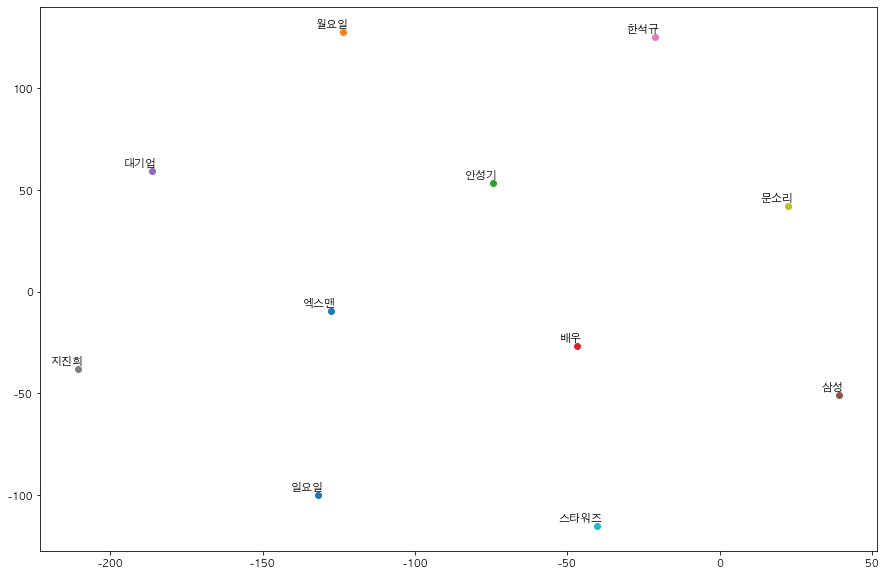

In [30]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib import rc

words = ['일요일', '월요일', '안성기', '배우', '대기업', '삼성', '한석규', '지진희', '문소리', '스타워즈', '엑스맨']
vecs = []

for word in words:
    vecs.append(model.wv[word])
    
# 한글 깨짐을 방지하는 코드
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

tsne_model = TSNE(
    perplexity=40, n_components=2, init='pca', n_iter=2500, 
    random_state=23)
new_values = tsne_model.fit_transform(vecs)

x = []
y = []

for value in new_values:
    x.append(value[0])
    y.append(value[1])

plt.figure(figsize=(15, 10)) 

for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(
        words[i], xy=(x[i], y[i]), xytext=(5, 2), 
        textcoords='offset points', ha='right', 
        va='bottom', fontweight='extra bold', fontsize=11)
plt.show()

## CountVectorizer

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

texts = ['나는 학교가 학교가 학교가 학교가 좋다', '학교가 너를 부른다', '나는 너를 부른다']
cnt_vec = CountVectorizer()
cnt_vec.fit(texts)
print(cnt_vec.vocabulary_)

for text in texts:
    print(text, cnt_vec.transform([text]).toarray())

{'나는': 0, '학교가': 4, '좋다': 3, '너를': 1, '부른다': 2}
나는 학교가 학교가 학교가 학교가 좋다 [[1 0 0 1 4]]
학교가 너를 부른다 [[0 1 1 0 1]]
나는 너를 부른다 [[1 1 1 0 0]]


## TF-IDF Vectorizer

TF(Term Frequency): 특정 단어가 하나의 문서 내에서 얼마나 자주 등장하는지 확인함<p>
DF(Document Frequency): 특정 단어가 여러 문서에 걸쳐서 얼마나 등장하는지 확인함<p>
IDF(Inverse Document Frequency): DF의 역수

<img src='https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbKcggU%2FbtqCkQ2NEH1%2FAp9xO7HQSDzfKixMyuGNCk%2Fimg.png' width=600 height=350></img>

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer()
tfidf_vec.fit(texts)
print(tfidf_vec.vocabulary_)
print(tfidf_vec.transform(texts).toarray())

{'나는': 0, '학교가': 4, '좋다': 3, '너를': 1, '부른다': 2}
[[0.2310701  0.         0.         0.30382942 0.92428042]
 [0.         0.57735027 0.57735027 0.         0.57735027]
 [0.57735027 0.57735027 0.57735027 0.         0.        ]]


In [34]:
import tensorflow as tf
from tensorflow.keras import preprocessing

samples = ['수학을 배우는 것은 매우 즐겁다', '수학 시간이 되면 행복해', '수학 시간이 기다려져',
          '수학은 어려워서 배우고 싶지 않아', '수학은 재미없어']
labels = [[1], [1], [1], [0], [0]]
tokenizer = preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

word_index = tokenizer.word_index

In [35]:
word_index

{'수학': 1,
 '시간이': 2,
 '수학은': 3,
 '수학을': 4,
 '배우는': 5,
 '것은': 6,
 '매우': 7,
 '즐겁다': 8,
 '되면': 9,
 '행복해': 10,
 '기다려져': 11,
 '어려워서': 12,
 '배우고': 13,
 '싶지': 14,
 '않아': 15,
 '재미없어': 16}

In [36]:
sequences

[[4, 5, 6, 7, 8], [1, 2, 9, 10], [1, 2, 11], [3, 12, 13, 14, 15], [3, 16]]

# 토픽 분석

토픽은 문서(Document) 내에서 여러 개의 단어로 구성된 하나의 의미를 갖는 덩어리라고 생각할 수 있다.<br>
즉, 하나의 글은 1개 이상의 토픽으로 구성될 수 있고, 그 토픽들은 여러 개의 단어(Terms)들로 구성되어 있다.

<img src='https://www.analyticsvidhya.com/wp-content/uploads/2016/08/Modeling1.png'>

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec

df = pd.read_excel('Data/future_sentence.xlsx', index_col=0, engine='openpyxl')

In [49]:
%%time
# 교정을 하고자 할 때는 수행하는 명령어
# 수행된 결과를 확인하고 수행하는 것이 좋다.
# 이 코드는 반드시 실행할 필요는 없다.
# 한글 띄어쓰기 등의 교정이므로 오랜 시간이 걸린다.

from hanspell import spell_checker

try:
    for i in range(len(df)):
        t = df.Sentence[i].replace('&', ' ')
        result = spell_checker.check(t)
        # 0-result, 1-original, 2-revised, 3-error number, 4-checked words, 5-time
        df.Sentence[i] = result[2]
        
except Exception as e:
    print(i)
    print(df.Sentence[i])

CPU times: user 17.8 s, sys: 1.59 s, total: 19.4 s
Wall time: 4min 51s


In [50]:
%%time
from konlpy.tag import Kkma

# 형태소 분석기 꼬꼬마를 사용한 토큰화 작업 (다소 시간 소요)
kkma = Kkma()

stopwords = ['ㆍ', 'ㄴ', '의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']
tokenized_data = []
for sentence in df['Sentence']:
    temp_X = kkma.morphs(sentence) # 토큰화
    temp_X = [word for word in temp_X if (not word in stopwords) and (len(word) > 1)] # 불용어 제거
    tokenized_data.append(temp_X)

CPU times: user 9min 12s, sys: 2.73 s, total: 9min 15s
Wall time: 3min 41s


문장 최대 길이 : 89
문장 평균 길이 : 25.326416600159618


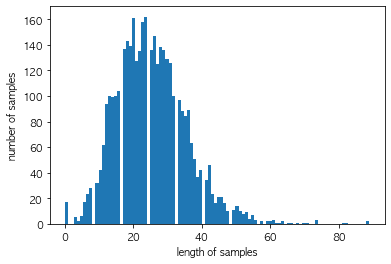

In [51]:
# 리뷰 길이 분포 확인
print('문장 최대 길이 :',max(len(l) for l in tokenized_data))
print('문장 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=100)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [53]:
from gensim.models import Word2Vec
import multiprocessing

num_scores = multiprocessing.cpu_count()
print('CPU Processor count:', num_scores)
model = Word2Vec(sentences=tokenized_data, size=100, window=5, min_count=10, workers=num_scores, sg=0)
# size: 벡터 크기, window: 고려할 앞뒤 폭, min_count: 단어의 최소 빈도, 
# workers: CPU 코어 수, sg: 0-CBOW, 1-skip-gram

CPU Processor count: 16


In [39]:
model.wv.most_similar('미래', topn=10)

[('과거', 0.8002863526344299),
 ('현재', 0.7682797312736511),
 ('암울', 0.7673295140266418),
 ('비참', 0.7672737240791321),
 ('김신', 0.7627039551734924),
 ('통일', 0.7502927780151367),
 ('젊은이들', 0.7351928949356079),
 ('자화상', 0.7303406000137329),
 ('발달', 0.7296354174613953),
 ('대처', 0.7292187809944153)]

In [42]:
# 영화배우 : 안성기 = 영화 : ? 의 관계를 추론함
model.wv.most_similar(positive=['현재', '인공지능'], negative=['미래'])
model.wv.most_similar(positive=['영화', '안성기'], negative=['영화배우'])

[('서프라이즈', 0.7098009586334229),
 ('B급 영화', 0.7021039724349976),
 ('저예산 영화', 0.6917040348052979),
 ('분장', 0.691387951374054),
 ('단점', 0.688869297504425),
 ('엑스트라', 0.688224732875824),
 ('공포 영화', 0.6829286217689514),
 ('코미디 영화', 0.6813628673553467),
 ('액션 영화', 0.6788080930709839),
 ('성인영화', 0.677447497844696)]

In [44]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_data)

corpus = [dictionary.doc2bow(text) for text in tokenized_data]

In [96]:
# 변수를 저장하기 위한 코드
import joblib

joblib.dump(tokenized_data, 'lda_tokenized.pkl')
joblib.dump(corpus, 'lda_corpus.pkl')

/Users/jhohunkoog/anaconda3/envs/nlp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['lda_corpus.pkl']

In [38]:
# 변수를 불러오기 위한 코드
import joblib

tokenized_data = joblib.load('lda_tokenized.pkl')
corpus = joblib.load('lda_corpus.pkl')

In [45]:
print(dictionary[108])

핵심


In [46]:
import gensim

NUM_TOPICS = 20 #20개의 토픽, k=20
ldamodel = gensim.models.ldamodel.LdaModel(
    corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
topics = ldamodel.print_topics(num_words=4)

[topic for topic in topics]

[(0, '0.055*"교육" + 0.033*"구축" + 0.030*"미래" + 0.019*"학교"'),
 (1, '0.086*"학교" + 0.046*"미래" + 0.037*"교육" + 0.035*"환경"'),
 (2, '0.056*"기자" + 0.046*"뉴스" + 0.035*"교육청" + 0.032*"밝히"'),
 (3, '0.064*"미래" + 0.049*"교육" + 0.035*"학교" + 0.027*"정책"'),
 (4, '0.092*"교육" + 0.042*"미래" + 0.020*"위하" + 0.019*"교육청"'),
 (5, '0.063*"교육" + 0.051*"학습" + 0.039*"지원" + 0.032*"미래"'),
 (6, '0.068*"부산" + 0.063*"교육" + 0.052*"미래" + 0.029*"위하"'),
 (7, '0.121*"코로나" + 0.074*"19" + 0.054*"교육" + 0.042*"미래"'),
 (8, '0.048*"교육" + 0.040*"산업" + 0.039*"미래" + 0.036*"혁명"'),
 (9, '0.073*"교육" + 0.073*"미래" + 0.020*"위하" + 0.018*"서울"'),
 (10, '0.067*"교육" + 0.051*"지역" + 0.036*"사업" + 0.031*"미래"'),
 (11, '0.093*"교육" + 0.031*"미래" + 0.017*"ㄴ다" + 0.016*"학생"'),
 (12, '0.052*"SW" + 0.048*"미래" + 0.047*"인천" + 0.043*"교육"'),
 (13, '0.083*"교육" + 0.049*"미래" + 0.023*"에서" + 0.017*"대전"'),
 (14, '0.091*"교육" + 0.044*"미래" + 0.036*"원격" + 0.030*"수업"'),
 (15, '0.045*"학교" + 0.041*"교육" + 0.040*"미래" + 0.039*"교육청"'),
 (16, '0.105*"교육" + 0.052*"미래" + 0.028*"혁신" + 

In [47]:
from gensim.models import CoherenceModel

# Compute Perplexity
print('Perplexity: ', ldamodel.log_perplexity(corpus))  

# Compute Coherence Score
coherence_model_lda = CoherenceModel(
    model=ldamodel, texts=tokenized_data, dictionary=dictionary, 
    coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Perplexity:  -7.143892927179541


KeyboardInterrupt: 

### 최적의 모델을 찾기 위해서는 Coherence 및 Perplexity 점수를 비교해야 한다.

In [66]:
%%time

df_topics = pd.DataFrame(columns=['topic', 'coherence', 'perplexity'])
lda_list = []

for i in range(2, 30):
    NUM_TOPICS = i
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
    topics = ldamodel.print_topics(num_words=4)
    [topic for topic in topics]

    # Compute Coherence Score
    coherence_model_lda = CoherenceModel(
        model=ldamodel, texts=tokenized_data, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    
    df_topics.loc[len(df_topics)] = [i, coherence_lda, ldamodel.log_perplexity(corpus)]
    
    lda_list.append(ldamodel)
    
    print('topic %d finished' % i)

topic 2 finished
topic 3 finished
topic 4 finished
topic 5 finished
topic 6 finished
topic 7 finished
topic 8 finished
topic 9 finished
topic 10 finished
topic 11 finished
topic 12 finished
topic 13 finished
topic 14 finished
topic 15 finished
topic 16 finished
topic 17 finished
topic 18 finished
topic 19 finished
topic 20 finished
topic 21 finished
topic 22 finished
topic 23 finished
topic 24 finished
topic 25 finished
topic 26 finished
topic 27 finished
topic 28 finished
topic 29 finished
CPU times: user 12min 39s, sys: 8.51 s, total: 12min 47s
Wall time: 13min 32s


In [ ]:
import joblib

joblib.dump(lda_list, 'lda_list.pkl')

In [48]:
#다시 불러올 때는
import joblib

lda_list = joblib.load('lda_list.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'lda_list.pkl'

In [ ]:
df_topics.coherence.idxmax(), df_topics.coherence.max()

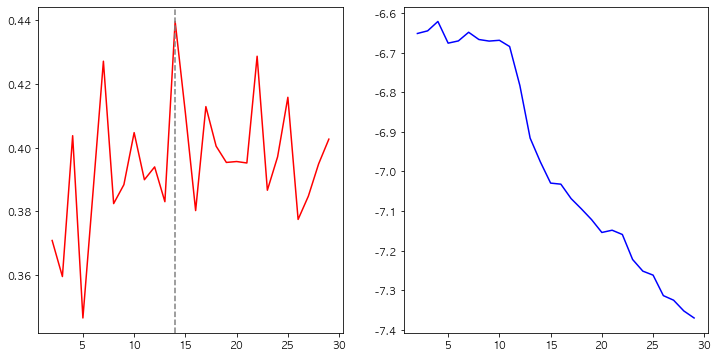

In [89]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(df_topics.topic, df_topics.coherence, 'r-')
plt.axvline(df_topics.coherence.idxmax()+2, linestyle='--', color='gray')

plt.subplot(1, 2, 2)
plt.plot(df_topics.topic, df_topics.perplexity, 'b-')
plt.show()

### 최적화된 값을 찾도록 한다.

In [90]:
ldamodel = lda_list[df_topics.coherence.idxmax()]

In [ ]:
!pip install pyldavis

In [91]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(vis)

In [92]:
for i, topic_list in enumerate(ldamodel[corpus]):
    if i==5: # 처음 5개까지만 살펴보자
        break
    print(i, '번째 문서의 topic 비율:', topic_list)
    # (토픽번호, 토픽비율)로 출력됨

0 번째 문서의 topic 비율: [(6, 0.9612849)]
1 번째 문서의 topic 비율: [(1, 0.9535621)]
2 번째 문서의 topic 비율: [(3, 0.14951678), (6, 0.2797355), (7, 0.47211677), (10, 0.07558295)]
3 번째 문서의 topic 비율: [(3, 0.07011374), (7, 0.89091647)]
4 번째 문서의 topic 비율: [(0, 0.070290945), (2, 0.61764634), (4, 0.15605475), (6, 0.14199714)]


/Users/jhohunkoog/anaconda3/envs/nlp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
topics = ldamodel.print_topics(num_words=8)

[topic for topic in topics]

/Users/jhohunkoog/anaconda3/envs/nlp/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.050*"교육" + 0.045*"미래" + 0.037*"경남" + 0.026*"파크" + 0.024*"테마" + 0.022*"교육감" + 0.016*"박종훈" + 0.013*"ㄴ다"'),
 (1,
  '0.080*"교육" + 0.048*"미래" + 0.033*"에서" + 0.025*"주제" + 0.024*"방향" + 0.022*"발표" + 0.019*"연구" + 0.018*"혁신"'),
 (2,
  '0.106*"교육" + 0.048*"미래" + 0.024*"학생" + 0.014*"학교" + 0.011*"중심" + 0.011*"정책" + 0.011*"ㄴ다" + 0.010*"과정"'),
 (3,
  '0.079*"교육" + 0.049*"미래" + 0.037*"교육청" + 0.024*"기자" + 0.015*"밝히" + 0.013*"교육감" + 0.013*"뉴스" + 0.012*"위하"'),
 (4,
  '0.051*"교육" + 0.048*"미래" + 0.025*"학교" + 0.024*"사업" + 0.020*"혁신" + 0.020*"추진" + 0.016*"육성" + 0.014*"지원"'),
 (5,
  '0.060*"아이" + 0.053*"우리" + 0.046*"경제" + 0.045*"운용" + 0.044*"자산" + 0.040*"프로그램" + 0.033*"미래" + 0.028*"초등학생"'),
 (6,
  '0.073*"교육" + 0.037*"미래" + 0.027*"위하" + 0.024*"구축" + 0.018*"지원" + 0.017*"원격" + 0.017*"학습" + 0.017*"수업"'),
 (7,
  '0.092*"학교" + 0.051*"미래" + 0.045*"교육" + 0.036*"환경" + 0.026*"생태" + 0.021*"위하" + 0.017*"추진" + 0.015*"교육청"'),
 (8,
  '0.032*"부산" + 0.030*"미래" + 0.028*"경남" + 0.025*"교육원" + 0.019*"지원" + 0.018*"교육청" +